Assumptions:
* Each branch contains decisions in all periods
* For hypervolume calculation: normalise with maxmin normalisation


In [1]:
import pickle

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
case = "Nepal"
output_folder = "infov1_4p"

rob_oois = [
    'total_costs_regret', 'nr_uncovered_DPs_regret',
    'total_uncovered_demand_regret', 'max_distr_time_regret',
    'max_distr_time_sigN', 'nr_uncovered_DPs_sigN', 'total_costs_sigN',
    'total_uncovered_demand_sigN'
]

In [94]:
# Load data (deserialize)
with open('{}/{}/python_objects.pickle'.format(case, output_folder),
          'rb') as handle:
    global_label_tree, EMA_model_dict, global_dfs_var_unc_data, global_fixed_unc, global_policy_tree = pickle.load(
        handle)

In [95]:
# global_label_tree
# EMA_model_dict
# global_dfs_var_unc_data
# global_fixed_unc
# global_policy_tree

### All EMA models 

In [96]:
EMA_model_dict

{'p0n0': <ema_workbench.em_framework.model.Model at 0x1d5f6dd7860>,
 'p0n0p1n1': <ema_workbench.em_framework.model.Model at 0x1d5f6e6e588>,
 'p0n0p1n2': <ema_workbench.em_framework.model.Model at 0x1d5f4739668>,
 'p0n0p1n3': <ema_workbench.em_framework.model.Model at 0x1d5f6dd7278>,
 'p0n0p1n4': <ema_workbench.em_framework.model.Model at 0x1d5f5e942e8>,
 'p0n0p1n5': <ema_workbench.em_framework.model.Model at 0x1d5f3fcf438>,
 'p0n0p1n6': <ema_workbench.em_framework.model.Model at 0x1d5f4c0a908>,
 'p0n0p1n1p2n7': <ema_workbench.em_framework.model.Model at 0x1d5f4034be0>,
 'p0n0p1n1p2n8': <ema_workbench.em_framework.model.Model at 0x1d5f3fd95c0>,
 'p0n0p1n1p2n9': <ema_workbench.em_framework.model.Model at 0x1d5f4c57b00>,
 'p0n0p1n1p2n10': <ema_workbench.em_framework.model.Model at 0x1d5f49ad8d0>,
 'p0n0p1n1p2n11': <ema_workbench.em_framework.model.Model at 0x1d5f4cd6668>,
 'p0n0p1n1p2n12': <ema_workbench.em_framework.model.Model at 0x1d5f4c37630>,
 'p0n0p1n2p2n13': <ema_workbench.em_frame

### Implemented FLS

### Check Decisions in tree and in tables
    TODO:
        Problem is:
            discrepency between csvs and global policy tree

In [97]:
global_policy_tree.keys()

dict_keys(['p0n0', 'p0n0p1n1', 'p0n0p1n2', 'p0n0p1n3', 'p0n0p1n4', 'p0n0p1n5', 'p0n0p1n6', 'p0n0p1n1p2n7', 'p0n0p1n1p2n8', 'p0n0p1n1p2n9', 'p0n0p1n1p2n10', 'p0n0p1n1p2n11', 'p0n0p1n1p2n12', 'p0n0p1n2p2n13', 'p0n0p1n2p2n14', 'p0n0p1n2p2n15', 'p0n0p1n2p2n16', 'p0n0p1n3p2n17', 'p0n0p1n3p2n18', 'p0n0p1n3p2n19', 'p0n0p1n4p2n20', 'p0n0p1n4p2n21', 'p0n0p1n4p2n22', 'p0n0p1n4p2n23', 'p0n0p1n4p2n24', 'p0n0p1n4p2n25', 'p0n0p1n5p2n26', 'p0n0p1n5p2n27', 'p0n0p1n5p2n28', 'p0n0p1n5p2n29', 'p0n0p1n5p2n30', 'p0n0p1n5p2n31', 'p0n0p1n6p2n32', 'p0n0p1n6p2n33', 'p0n0p1n6p2n34', 'p0n0p1n1p2n7p3n35', 'p0n0p1n1p2n7p3n36', 'p0n0p1n1p2n7p3n37', 'p0n0p1n1p2n7p3n38', 'p0n0p1n1p2n7p3n39', 'p0n0p1n1p2n8p3n40', 'p0n0p1n1p2n8p3n41', 'p0n0p1n1p2n8p3n42', 'p0n0p1n1p2n8p3n43', 'p0n0p1n1p2n8p3n44', 'p0n0p1n1p2n8p3n45', 'p0n0p1n1p2n9p3n46', 'p0n0p1n1p2n9p3n47', 'p0n0p1n1p2n9p3n48', 'p0n0p1n1p2n9p3n49', 'p0n0p1n1p2n9p3n50', 'p0n0p1n1p2n9p3n51', 'p0n0p1n1p2n10p3n52', 'p0n0p1n1p2n10p3n53', 'p0n0p1n1p2n10p3n54', 'p0n0p1n1p2n1

In [98]:
for key in global_policy_tree.keys():
    poldict = global_policy_tree[key]
    print(key,[key2 for key2 in poldict if poldict[key2]==1])

p0n0 []
p0n0p1n1 ['FLO3']
p0n0p1n2 ['FLO4']
p0n0p1n3 ['FLO11']
p0n0p1n4 ['FLO13']
p0n0p1n5 ['FLO14']
p0n0p1n6 ['FLO19']
p0n0p1n1p2n7 ['FLO3', 'FLO11']
p0n0p1n1p2n8 ['FLO3', 'FLO12']
p0n0p1n1p2n9 ['FLO3', 'FLO13']
p0n0p1n1p2n10 ['FLO3', 'FLO14']
p0n0p1n1p2n11 ['FLO3', 'FLO15']
p0n0p1n1p2n12 ['FLO3', 'FLO19']
p0n0p1n2p2n13 ['FLO4', 'FLO11']
p0n0p1n2p2n14 ['FLO4', 'FLO13']
p0n0p1n2p2n15 ['FLO4', 'FLO17']
p0n0p1n2p2n16 ['FLO4', 'FLO19']
p0n0p1n3p2n17 ['FLO11', 'FLO12']
p0n0p1n3p2n18 ['FLO11', 'FLO13']
p0n0p1n3p2n19 ['FLO11', 'FLO17']
p0n0p1n4p2n20 ['FLO9', 'FLO13']
p0n0p1n4p2n21 ['FLO11', 'FLO13']
p0n0p1n4p2n22 ['FLO12', 'FLO13']
p0n0p1n4p2n23 ['FLO13', 'FLO15']
p0n0p1n4p2n24 ['FLO13', 'FLO17']
p0n0p1n4p2n25 ['FLO13', 'FLO19']
p0n0p1n5p2n26 ['FLO11', 'FLO14']
p0n0p1n5p2n27 ['FLO12', 'FLO14']
p0n0p1n5p2n28 ['FLO13', 'FLO14']
p0n0p1n5p2n29 ['FLO14', 'FLO15']
p0n0p1n5p2n30 ['FLO14', 'FLO17']
p0n0p1n5p2n31 ['FLO14', 'FLO19']
p0n0p1n6p2n32 ['FLO11', 'FLO19']
p0n0p1n6p2n33 ['FLO13', 'FLO19']
p0n

In [99]:
def print_originating_from(global_policy_tree, node):
    for key in global_policy_tree.keys():
        if node in key:
            poldict = global_policy_tree[key]
            print(key,[key2 for key2 in poldict if poldict[key2]==1])
            
print_originating_from(global_policy_tree,"n2")

p0n0p1n2 ['FLO4']
p0n0p1n2p2n13 ['FLO4', 'FLO11']
p0n0p1n2p2n14 ['FLO4', 'FLO13']
p0n0p1n2p2n15 ['FLO4', 'FLO17']
p0n0p1n2p2n16 ['FLO4', 'FLO19']
p0n0p1n4p2n20 ['FLO9', 'FLO13']
p0n0p1n4p2n21 ['FLO11', 'FLO13']
p0n0p1n4p2n22 ['FLO12', 'FLO13']
p0n0p1n4p2n23 ['FLO13', 'FLO15']
p0n0p1n4p2n24 ['FLO13', 'FLO17']
p0n0p1n4p2n25 ['FLO13', 'FLO19']
p0n0p1n5p2n26 ['FLO11', 'FLO14']
p0n0p1n5p2n27 ['FLO12', 'FLO14']
p0n0p1n5p2n28 ['FLO13', 'FLO14']
p0n0p1n5p2n29 ['FLO14', 'FLO15']
p0n0p1n2p2n13p3n69 ['FLO4', 'FLO7', 'FLO11']
p0n0p1n2p2n13p3n70 ['FLO4', 'FLO11', 'FLO13']
p0n0p1n2p2n13p3n71 ['FLO4', 'FLO11', 'FLO17']
p0n0p1n2p2n13p3n72 ['FLO4', 'FLO11', 'FLO19']
p0n0p1n2p2n14p3n73 ['FLO4', 'FLO7', 'FLO13']
p0n0p1n2p2n14p3n74 ['FLO4', 'FLO11', 'FLO13']
p0n0p1n2p2n14p3n75 ['FLO4', 'FLO13', 'FLO15']
p0n0p1n2p2n14p3n76 ['FLO4', 'FLO13', 'FLO17']
p0n0p1n2p2n14p3n77 ['FLO4', 'FLO13', 'FLO19']
p0n0p1n2p2n15p3n78 ['FLO4', 'FLO7', 'FLO17']
p0n0p1n2p2n15p3n79 ['FLO4', 'FLO11', 'FLO17']
p0n0p1n2p2n15p3n80 ['F

In [100]:
set_fls = set()
for key in global_policy_tree.keys():
    poldict = global_policy_tree[key]
    for fl in ([key2 for key2 in poldict if poldict[key2]==1]):
        set_fls.add(fl)
set_fls

{'FLO1',
 'FLO11',
 'FLO12',
 'FLO13',
 'FLO14',
 'FLO15',
 'FLO16',
 'FLO17',
 'FLO19',
 'FLO3',
 'FLO4',
 'FLO7',
 'FLO8',
 'FLO9'}

### Plot changes uncertainty ranges

In [101]:
# global_label_tree


In [102]:
def shorten_labels(label,lab_list = []):
    if "p" in label:
        for i in range(len(label)):
            if label[-i-1] == "p":
                flag = i
                break
        new_label = label[:-i-1]
        lab_list.append(label)
        return shorten_labels(new_label,lab_list), lab_list


def find_full_trace(label):
    b=[]
    a,b = shorten_labels(label,b)
    return list(reversed(b))

In [103]:
#neem de eerste uit de laatste periode
label= global_label_tree[sorted(global_label_tree.keys())[-1]][0]
# # for i in global_label_tree.values():
# #     pass

testlabels = list((find_full_trace(label)))

In [104]:
testlabels

['p0n0',
 'p0n0p1n1',
 'p0n0p1n1p2n7',
 'p0n0p1n1p2n7p3n35',
 'p0n0p1n1p2n7p3n35p4n171']

Check Progress in MPMORDM v8 file. Not super Interesting

### Calculate final performance of all leaves (multi period robust performance)
can also do for best-estimate performance

    create trace of labels
    create order of implemented FLs
    Find robustness performance for each last decision
    Add performances

In [105]:
# get labels for last period leaves
last_p = sorted([int(l[1:]) for l in global_label_tree.keys()])[-1]
last_p_labels = global_label_tree["p{}".format(last_p)]

In [106]:
def find_decision(global_policy_tree,trace):
    """
    for a trace, find all decisions made, in the right sequence
    """
    all_decisions = []
    for key in (trace):
        pol = global_policy_tree[key]
        for key in pol:
            if pol[key] == 1:
                if key not in all_decisions:
                    # print(key)
                    all_decisions.append(key)
    return all_decisions

In [108]:
performance_dict = {}
#for all leaves
for label in last_p_labels:
    trace = find_full_trace(label)
    # find all decisions made for each leave
    decisions = find_decision(global_policy_tree,trace)
    
    # create dataframe with performance of a leave for each period
    temp_df = pd.DataFrame()
    for i in range(len(trace)-1):
#         print(i)
        testdf = pd.read_csv("{}/{}/nondom_rob_pols{}.csv".format(case,output_folder,trace[i]), index_col=0)
        temp_df = temp_df.append(testdf[testdf.index == int(decisions[i][3:])])
    # Sum performance values of each period
#     print("all shapes should be the same: periods x objs:",temp_df.shape)
    performance_dict[label] = temp_df[rob_oois].sum()


In [109]:
performance_multi_period_robust = pd.DataFrame.from_dict(performance_dict, orient="index" )

In [110]:
performance_multi_period_robust

,total_costs_regret,nr_uncovered_DPs_regret,total_uncovered_demand_regret,max_distr_time_regret,max_distr_time_sigN,nr_uncovered_DPs_sigN,total_costs_sigN,total_uncovered_demand_sigN
p0n0p1n1p2n10p3n52p4n246,7.017320e+05,32.0,50875.322618,68250.923217,7.325426e+08,283.111282,2.432189e+10,5.033186e+08
p0n0p1n1p2n10p3n52p4n247,6.703171e+05,35.0,56052.792756,53929.216077,7.589656e+08,280.525298,1.980306e+10,5.075907e+08
p0n0p1n1p2n10p3n52p4n248,7.352839e+05,29.0,47621.832600,72305.755220,7.378362e+08,267.962657,2.721518e+10,4.945530e+08
p0n0p1n1p2n10p3n52p4n249,5.968303e+05,37.0,57954.105184,42070.032122,8.594901e+08,310.672346,1.683428e+10,5.520565e+08
p0n0p1n1p2n10p3n52p4n250,6.406046e+05,37.0,57463.340093,54119.110620,8.659955e+08,291.515288,1.857842e+10,5.380723e+08
p0n0p1n1p2n10p3n52p4n251,4.341356e+05,39.0,59299.556763,26091.534616,7.443064e+08,294.330873,1.298600e+10,5.729042e+08
p0n0p1n1p2n10p3n52p4n252,4.862952e+05,38.0,58467.178434,130237.470983,2.132233e+09,297.167496,1.449305e+10,5.662905e+08
p0n0p1n1p2n10p3n53p4n253,1.041875e+06,25.0,45621.931042,125292.679884,1.136760e+09,262.035879,6.548598e+10,4.060297e+08
p0n0p1n1p2n10p3n53p4n254,9.230010e+05,29.0,46930.430835,75212.990940,7.423456e+08,251.618943,4.887811e+10,3.919678e+08
p0n0p1n1p2n10p3n53p4n255,7.847584e+05,29.0,50045.175189,79674.971523,7.485022e+08,253.577080,3.715808e+10,4.231533e+08


In [111]:
from lib.parallel_plotting import plot_optimal

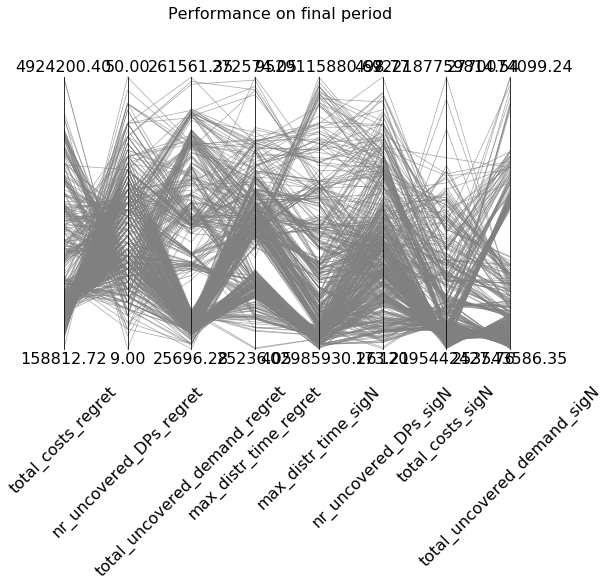

In [112]:
plot_optimal(performance_multi_period_robust, rob_oois, "Performance on final period")

    Define performance of each leaf:
        create hypervolumes for each leaf
        Check for nondominated or not: {0,1} classification
    

### Calculate robustness performance over time

Do this also for best-estimate performance over time

In [113]:
last_p = max([int(key[1:]) for key in global_label_tree.keys()])
last_p_labels = global_label_tree["p{}".format(last_p)]

In [114]:
def performance_over_time_df(objective, last_p_labels):
    performance_dict = {}
    for label in last_p_labels:
#         print(label)
        trace = find_full_trace(label)
#         print(trace)
        # find all decisions made for each leave
        decisions = find_decision(global_policy_tree, trace)
        #     print(decisions)

        # create dataframe with performance of a leave for each period
        temp_list = list()
        for i in range(len(trace) - 1):
            #         print(i)
            tempdf = pd.read_csv(
                "{}/{}/nondom_rob_pols{}.csv".format(case, output_folder,
                                                     trace[i]),
                index_col=0)
            temp_array = tempdf[tempdf.index == int(decisions[i][3:])]
            temp_list.append(float(temp_array[objective]))

        performance_dict[label] = (temp_list)
    tempdf2 = pd.DataFrame.from_dict(
        performance_dict,
        orient="index",
        columns=list(global_label_tree.keys())[1:])
    return tempdf2

In [115]:
dict_performance_over_time = dict()
for ooi in rob_oois:
    dict_performance_over_time[ooi] = performance_over_time_df(
        ooi, last_p_labels)

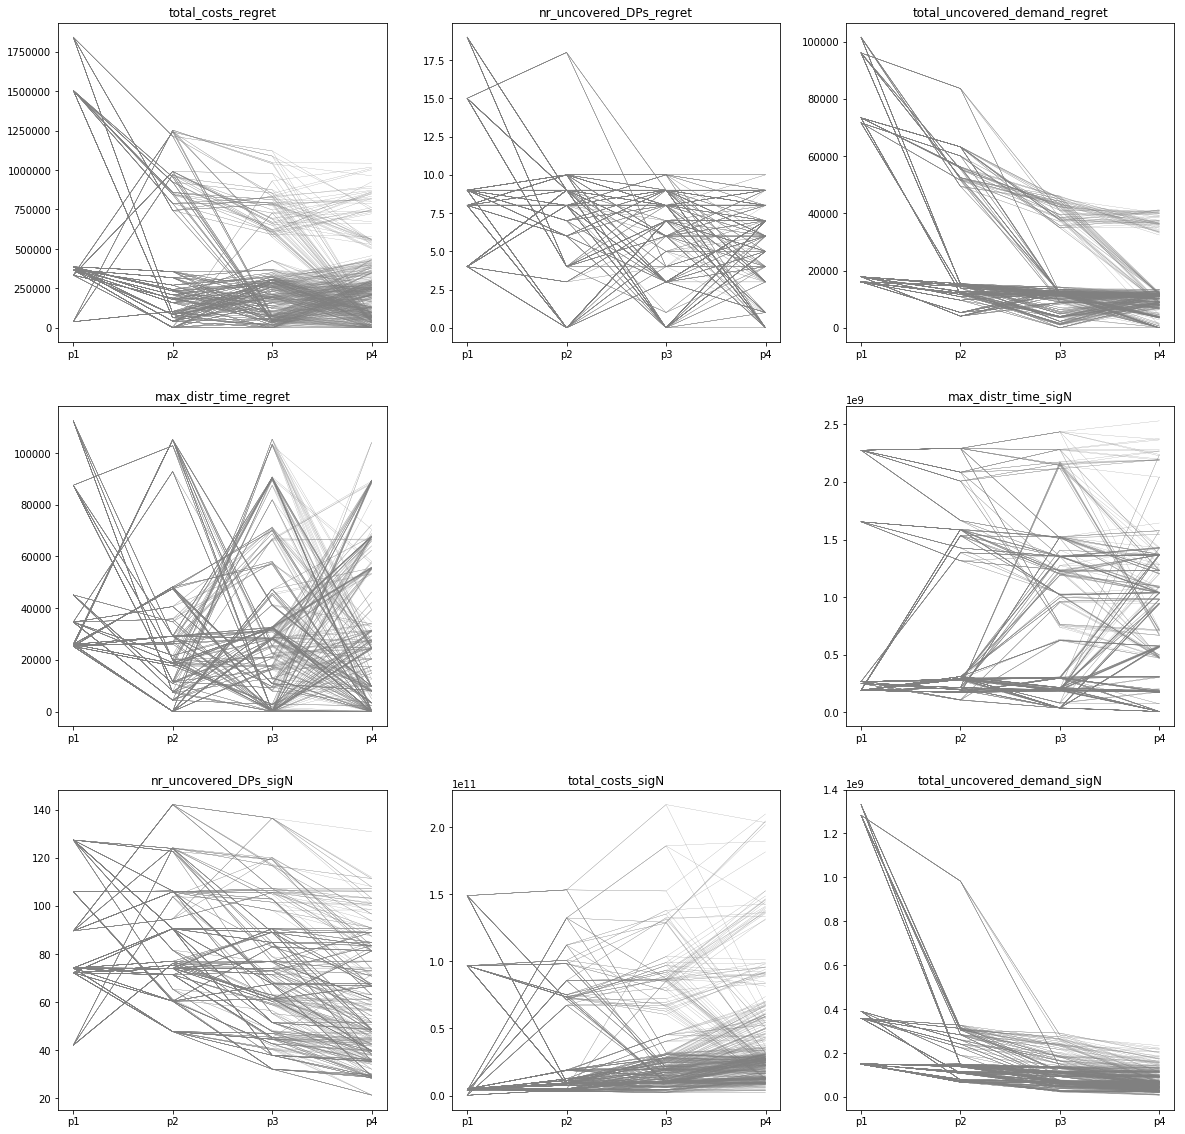

In [125]:
fig = plt.figure(figsize=(20,20))
for i, (key, df) in enumerate(dict_performance_over_time.items()):
    if i>=4:
        i += 1
    ax = fig.add_subplot(3,3,i+1)
    ax.plot(df.T, linewidth=0.2, color="grey")
    ax.set_title(key)
    
#     plot_optimal(df, df.columns, "Performance over time: {}".format(key))

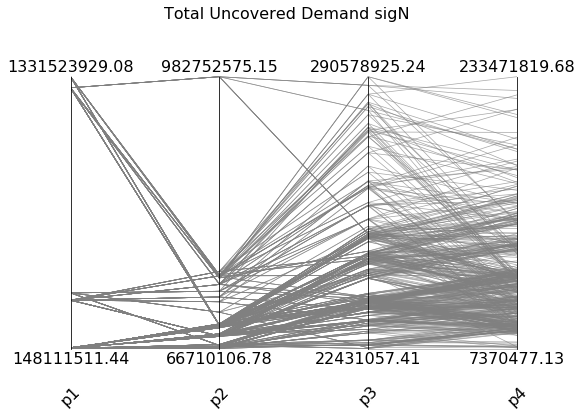

In [121]:
plot_optimal(df, df.columns, "Total Uncovered Demand sigN" )

### Calculate Hypervolumes for last period (for alternatives under uncertainty)

In [ ]:
# Normalise last step results

# Set reference point vector[0,..,0] with length for objs.

# Calculate Hypervolume



In [130]:
performance_multi_period_robust.head()

,total_costs_regret,nr_uncovered_DPs_regret,total_uncovered_demand_regret,max_distr_time_regret,max_distr_time_sigN,nr_uncovered_DPs_sigN,total_costs_sigN,total_uncovered_demand_sigN
p0n0p1n1p2n10p3n52p4n246,701731.956840,32.0,50875.322618,68250.923217,7.325426e+08,283.111282,2.432189e+10,5.033186e+08
p0n0p1n1p2n10p3n52p4n247,670317.137337,35.0,56052.792756,53929.216077,7.589656e+08,280.525298,1.980306e+10,5.075907e+08
p0n0p1n1p2n10p3n52p4n248,735283.927592,29.0,47621.832600,72305.755220,7.378362e+08,267.962657,2.721518e+10,4.945530e+08
p0n0p1n1p2n10p3n52p4n249,596830.314266,37.0,57954.105184,42070.032122,8.594901e+08,310.672346,1.683428e+10,5.520565e+08
p0n0p1n1p2n10p3n52p4n250,640604.645337,37.0,57463.340093,54119.110620,8.659955e+08,291.515288,1.857842e+10,5.380723e+08


In [129]:
def normalise_df (df):
    normalised_df=(df-df.min())/(df.max()-df.min())
    return normalised_df

In [133]:
normalised_final_robust_performance = normalise_df(performance_multi_period_robust)

#### with Pygmo 

In [207]:
import pygmo as pg

In [208]:
from pygmo import hypervolume

In [209]:
testnp = np.array(normalised_final_robust_performance)

In [210]:
testnp.shape

(544, 8)

In [211]:
hv = hypervolume(testnp)

In [212]:
ref_point = [1,]*8

In [213]:
hv.compute(ref_point)

0.5957957758181327

In [153]:
contributions = hv.contributions(ref_point)

In [156]:
testdf = pd.DataFrame(contributions)

In [215]:
contributions.shape

(544,)

#### With Platypus

In [160]:
from platypus import Hypervolume, calculate

In [162]:
hyp = Hypervolume(minimum=[0]*8, maximum=[1]*8)

In [214]:
# Doesnt work, because it requires platypus optimisation result format
# Do it with Erin's code'
# hyp_result = calculate(testnp, hyp)

### Calculate uncertainty ranges

#### Last step

In [ ]:
# Create 

#### All steps

TODO: Check what's wrong with changing uncertainty over time.

Maybe mistake is within uncertainty changing algorithm in MPMORDM: Check Tonight! 

In [225]:
test = global_dfs_var_unc_data['p0n0'].upper - global_dfs_var_unc_data['p0n0'].lower

In [230]:
test.mean(), test.min(), test.max(), test.sum()


(0.5344975326131158,
 0.06782740804830634,
 0.9743092179079464,
 26.724876630655785)

In [321]:
uncertainty_over_time = pd.DataFrame()
for key in sorted(global_dfs_var_unc_data.keys()):
    tmp = global_dfs_var_unc_data[key].upper - global_dfs_var_unc_data[key].lower
    uncertainty_over_time = uncertainty_over_time.append(
        [[tmp.mean(), tmp.min(), tmp.max(),
         tmp.sum()]])
    
uncertainty_over_time.columns = ['mean', 'min', 'max','sum']
uncertainty_over_time.index = sorted(global_dfs_var_unc_data)

In [335]:
uncertainty_over_time.index[1] =='p0n0p1n1'

True

In [338]:
uncertainty_over_time.loc[['p0n0p1n1', 'p0n0p1n2', 'p0n0p1n3', 'p0n0p1n4', 'p0n0p1n5', 'p0n0p1n6']]

,mean,min,max,sum
p0n0p1n1,0.320844,0.048239,0.543675,16.042211
p0n0p1n2,0.320844,0.048239,0.543675,16.042211
p0n0p1n3,0.320844,0.048239,0.543675,16.042211
p0n0p1n4,0.320844,0.048239,0.543675,16.042211
p0n0p1n5,0.320844,0.048239,0.543675,16.042211
p0n0p1n6,0.320844,0.048239,0.543675,16.042211


In [328]:
global_label_tree['p1']

['p0n0p1n1', 'p0n0p1n2', 'p0n0p1n3', 'p0n0p1n4', 'p0n0p1n5', 'p0n0p1n6']

In [343]:
global_dfs_var_unc_data['p0n0p1n1'] == global_dfs_var_unc_data['p0n0p1n2']

,actual,lower,upper,best_estimate
DSRDP0,True,True,True,True
DSRDP1,True,True,True,True
DSRDP2,True,True,True,True
DSRDP3,True,True,True,True
DSRDP4,True,True,True,True
DSRDP5,True,True,True,True
DSRDP6,True,True,True,True
DSRDP7,True,True,True,True
DSRDP8,True,True,True,True
DSRDP9,True,True,True,True


,actual,lower,upper,best_estimate
DSRDP0,1.424449,1.264822,1.732551,1.498687
DSRDP1,1.643277,1.480942,1.807897,1.644419
DSRDP2,1.673795,1.659526,1.790205,1.724866
DSRDP3,1.291863,1.148861,1.344480,1.246671
DSRDP4,1.009784,1.009322,1.486136,1.247729


In [280]:
uncertainty_at_p = dict()

In [281]:
sorted(global_label_tree.keys())

['p0', 'p1', 'p2', 'p3', 'p4']

In [282]:
for key1 in reversed(sorted(global_label_tree.keys())):
    # put in dictionary
    uncertainty_at_p[key1] = uncertainty_over_time[[[
        True if key1 in key2 else False
    ] for key2 in uncertainty_over_time.index]]
    # Delete from list
    uncertainty_over_time = uncertainty_over_time[[[
        False if key1 in key2 else True
    ] for key2 in uncertainty_over_time.index]]

In [344]:
tempdf = uncertainty_at_p['p4']

In [345]:
tempdf

,mean,min,max,sum
p0n0p1n1p2n10p3n52p4n246,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n52p4n247,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n52p4n248,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n52p4n249,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n52p4n250,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n52p4n251,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n52p4n252,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n53p4n253,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n53p4n254,0.006315,0.000147,0.087027,0.315729
p0n0p1n1p2n10p3n53p4n255,0.006315,0.000147,0.087027,0.315729


### Visualise uncertainty ranges x hypervolumes

#### Visualise uncertainty ranges x hypervolumes over time

### Compare hypervolumes for perfect info and uncertainty

Compare perfect and uncertain information hypervolume (= single value for full pareto front)
    When normalising for the two outcome comparisons: make sure to use min and max on both dataframes
that is the price you pay for not having perfect information

Maybe do this for every period? 
    Maybe not: different way of running perfect info network. Also the reduction of information over time should then be included. 
    If you do this for every period